# Retail Customer Profiling - Based on K-Means Clustering Algorithm　

# 1.  Import data

In [2]:
import pandas as pd
data = pd.read_csv('/kaggle/input/dunnhumby-the-complete-journey/hh_demographic.csv')
data.head()

,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,household_key
0,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,1
1,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,7
2,25-34,U,25-34K,Unknown,2 Adults Kids,3,1,8
3,25-34,U,75-99K,Homeowner,2 Adults Kids,4,2,13
4,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown,16


In [20]:
data_key = data.set_index('household_key').sort_values(by='household_key')

data_key.head()

,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC
household_key,,,,,,,
1,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown
7,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown
8,25-34,U,25-34K,Unknown,2 Adults Kids,3,1
13,25-34,U,75-99K,Homeowner,2 Adults Kids,4,2
16,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown


# 2. Explore data

In [21]:
data_key.nunique()

AGE_DESC                6
MARITAL_STATUS_CODE     3
INCOME_DESC            12
HOMEOWNER_DESC          5
HH_COMP_DESC            6
HOUSEHOLD_SIZE_DESC     5
KID_CATEGORY_DESC       4
dtype: int64

In [22]:
data_key.shape

(801, 7)

In [23]:
data.isna().sum()

AGE_DESC               0
MARITAL_STATUS_CODE    0
INCOME_DESC            0
HOMEOWNER_DESC         0
HH_COMP_DESC           0
HOUSEHOLD_SIZE_DESC    0
KID_CATEGORY_DESC      0
household_key          0
dtype: int64

In [7]:
data_key.describe()

,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC
count,801,801,801,801,801,801,801
unique,6,3,12,5,6,5,4
top,45-54,U,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown
freq,288,344,192,504,255,318,558


In [24]:
for col in data_key.columns:
    value_counts = data_key[col].value_counts()
    print(f'{col} Freq:')
    print(value_counts)

AGE_DESC Freq:
AGE_DESC
45-54    288
35-44    194
25-34    142
65+       72
55-64     59
19-24     46
Name: count, dtype: int64
MARITAL_STATUS_CODE Freq:
MARITAL_STATUS_CODE
U    344
A    340
B    117
Name: count, dtype: int64
INCOME_DESC Freq:
INCOME_DESC
50-74K       192
35-49K       172
75-99K        96
25-34K        77
15-24K        74
Under 15K     61
125-149K      38
100-124K      34
150-174K      30
250K+         11
175-199K      11
200-249K       5
Name: count, dtype: int64
HOMEOWNER_DESC Freq:
HOMEOWNER_DESC
Homeowner          504
Unknown            233
Renter              42
Probable Renter     11
Probable Owner      11
Name: count, dtype: int64
HH_COMP_DESC Freq:
HH_COMP_DESC
2 Adults No Kids    255
2 Adults Kids       187
Single Female       144
Single Male          95
Unknown              73
1 Adult Kids         47
Name: count, dtype: int64
HOUSEHOLD_SIZE_DESC Freq:
HOUSEHOLD_SIZE_DESC
2     318
1     255
3     109
5+     66
4      53
Name: count, dtype: int64
KID_CATEGORY

# 3. Data pre-processing

## 3.1 Lable Encode

In [25]:
def map_age_desc(age_desc):
    if age_desc == '19-24': return 1
    elif age_desc == '25-34':return 2
    elif age_desc == '35-44': return 3
    elif age_desc == '45-54': return 4
    elif age_desc == '55-64': return 5
    elif age_desc == '65+': return 6
    else: return None

data_key['age_desc_n'] = data_key['AGE_DESC'].apply(map_age_desc)

def map_marital_status_code(code):
    if code == 'A':  return 3
    elif code == 'U': return 1
    elif code == 'B': return 2
    else: return None
    
data_key['MARITAL_STATUS_CODE_n'] = data_key['MARITAL_STATUS_CODE'].apply(map_marital_status_code)

def map_income_desc(income_desc):
    if income_desc == 'Under 15K':return 1
    elif income_desc == '15-24K':return 2
    elif income_desc == '25-34K': return 3
    elif income_desc == '35-49K': return 4
    elif income_desc == '50-74K': return 5
    elif income_desc == '75-99K':  return 6
    elif income_desc == '100-124K':  return 7
    elif income_desc == '125-149K': return 8
    elif income_desc == '150-174K':  return 9
    elif income_desc == '175-199K': return 10
    elif income_desc == '200-249K': return 11
    elif income_desc == '250K+': return 12
    else: return None

data_key['INCOME_DESC_n'] = data_key['INCOME_DESC'].apply(map_income_desc)

def map_homeowner_desc(homeowner_desc):
    if homeowner_desc == 'Unknown': return 1
    elif homeowner_desc == 'Probable Renter': return 2
    elif homeowner_desc == 'Renter':  return 3
    elif homeowner_desc == 'Probable Owner':  return 4
    elif homeowner_desc == 'Homeowner': return 5
    else: return None

data_key['HOMEOWNER_DESC_n'] = data_key['HOMEOWNER_DESC'].apply(map_homeowner_desc)

def map_hh_comp_desc(hh_comp_desc):
    if hh_comp_desc == 'Unknown': return 1
    elif hh_comp_desc == 'Single Female':  return 2
    elif hh_comp_desc == 'Single Male':  return 3
    elif hh_comp_desc == '1 Adult Kids':  return 4
    elif hh_comp_desc == '2 Adults No Kids': return 5
    elif hh_comp_desc == '2 Adults Kids': return 6
    else:  return 0  

data_key['HH_COMP_DESC_n'] = data_key['HH_COMP_DESC'].apply(map_hh_comp_desc)

def map_household_size_desc(desc):
    if desc == '1': return 1
    elif desc == '2':  return 2
    elif desc == '3': return 3
    elif desc == '4': return 4
    elif desc == '5+':  return 5
    else:  return None

data_key['HOUSEHOLD_SIZE_DESC_n'] = data_key['HOUSEHOLD_SIZE_DESC'].apply(map_household_size_desc)


def map_kid_category_desc(desc):
    if desc == 'None/Unknown': return 1
    elif desc == '1':  return 2
    elif desc == '2': return 3
    elif desc == '3+':  return 4
    else: return None

data_key['KID_CATEGORY_DESC_n'] = data_key['KID_CATEGORY_DESC'].apply(map_kid_category_desc)

data_key

,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,age_desc_n,MARITAL_STATUS_CODE_n,INCOME_DESC_n,HOMEOWNER_DESC_n,HH_COMP_DESC_n,HOUSEHOLD_SIZE_DESC_n,KID_CATEGORY_DESC_n
household_key,,,,,,,,,,,,,,
1,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,6,3,4,5,5,2,1
7,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,4,3,5,5,5,2,1
8,25-34,U,25-34K,Unknown,2 Adults Kids,3,1,2,1,3,1,6,3,2
13,25-34,U,75-99K,Homeowner,2 Adults Kids,4,2,2,1,6,5,6,4,3
16,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown,4,2,5,5,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,35-44,U,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,3,1,5,5,5,2,1
2496,45-54,A,75-99K,Homeowner,Unknown,3,1,4,3,6,5,1,3,2
2497,45-54,U,35-49K,Unknown,Single Male,1,None/Unknown,4,1,4,1,3,1,1


## 3.2  Keep numeric columns

In [10]:
selected_columns = ['age_desc_n', 'MARITAL_STATUS_CODE_n', 'INCOME_DESC_n', 'HOMEOWNER_DESC_n', 'HH_COMP_DESC_n', 'HOUSEHOLD_SIZE_DESC_n', 'KID_CATEGORY_DESC_n']
data_key = data_key[selected_columns]
data_key

,age_desc_n,MARITAL_STATUS_CODE_n,INCOME_DESC_n,HOMEOWNER_DESC_n,HH_COMP_DESC_n,HOUSEHOLD_SIZE_DESC_n,KID_CATEGORY_DESC_n
household_key,,,,,,,
1,6,3,4,5,5,2,1
7,4,3,5,5,5,2,1
8,2,1,3,1,6,3,2
13,2,1,6,5,6,4,3
16,4,2,5,5,2,1,1
...,...,...,...,...,...,...,...
2494,3,1,5,5,5,2,1
2496,4,3,6,5,1,3,2
2497,4,1,4,1,3,1,1


In [11]:
data_key.dtypes

age_desc_n               int64
MARITAL_STATUS_CODE_n    int64
INCOME_DESC_n            int64
HOMEOWNER_DESC_n         int64
HH_COMP_DESC_n           int64
HOUSEHOLD_SIZE_DESC_n    int64
KID_CATEGORY_DESC_n      int64
dtype: object

In [12]:
data_key.describe()

,age_desc_n,MARITAL_STATUS_CODE_n,INCOME_DESC_n,HOMEOWNER_DESC_n,HH_COMP_DESC_n,HOUSEHOLD_SIZE_DESC_n,KID_CATEGORY_DESC_n
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,3.484395,1.995006,4.710362,3.676654,4.033708,2.197253,1.550562
std,1.279675,0.924649,2.264620,1.803903,1.706638,1.193123,0.956688
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,1.000000,3.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,2.000000,5.000000,5.000000,5.000000,2.000000,1.000000
75%,4.000000,3.000000,6.000000,5.000000,5.000000,3.000000,2.000000
max,6.000000,3.000000,12.000000,5.000000,6.000000,5.000000,4.000000


## 3.3 Visualize the data

array([[<Axes: title={'center': 'age_desc_n'}>,
        <Axes: title={'center': 'MARITAL_STATUS_CODE_n'}>,
        <Axes: title={'center': 'INCOME_DESC_n'}>],
       [<Axes: title={'center': 'HOMEOWNER_DESC_n'}>,
        <Axes: title={'center': 'HH_COMP_DESC_n'}>,
        <Axes: title={'center': 'HOUSEHOLD_SIZE_DESC_n'}>],
       [<Axes: title={'center': 'KID_CATEGORY_DESC_n'}>, <Axes: >,
        <Axes: >]], dtype=object)

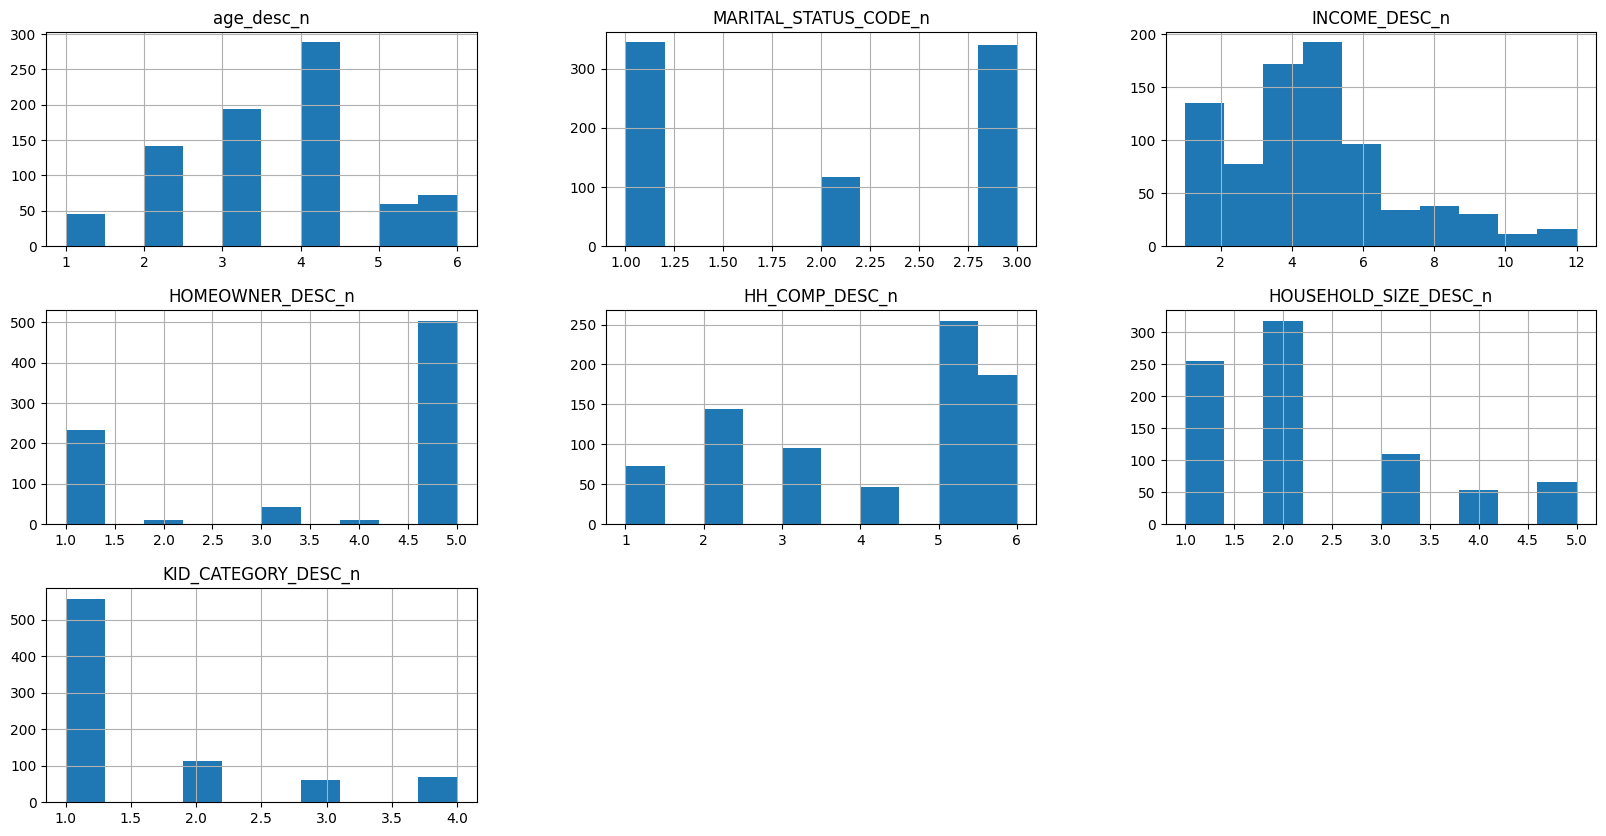

In [13]:
data_key.hist(figsize=(20,10))

- The majority of buyers fall within the age range of 35-54 years.
- Married individuals are more than unmarried ones.
- A significant portion of the population has an income below $100,000.
- Most individuals are homeowners.
- Household sizes are predominantly one-person and two-person households.

# 4. K-means Cluster

## 4.1 Normalize the variables

In [14]:
# Unskew the data
import numpy as np
data_log = np.log(data_key)
# Normalize the variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data_log)

# Store for clustering
data_normalized = scaler.transform(data_log)

print('mean: ', data_normalized.mean(axis=0).round(2))
print('std: ', data_normalized.std(axis=0).round(2))

mean:  [-0.  0.  0.  0.  0.  0.  0.]
std:  [1. 1. 1. 1. 1. 1. 1.]


## 4.2 Define the number of clusters

### 4.2.1 Elbow Method

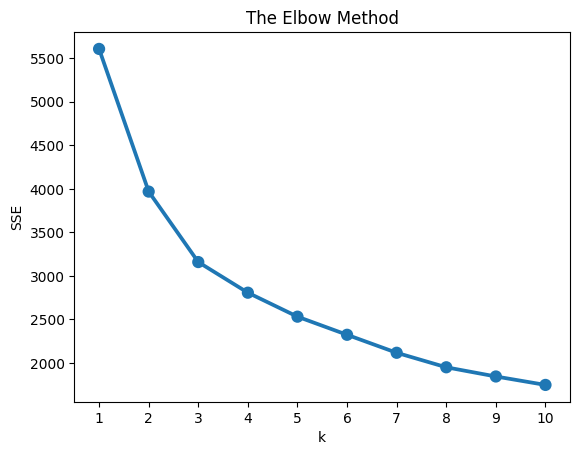

In [15]:
# define the number of clusters
# Visual methods - elbow criterion
# Import key libraries
from sklearn.cluster import KMeans
import seaborn as sns
from matplotlib import pyplot as plt
# Fit KMeans and calculate SSE for each *k*
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=1, n_init=10)
    kmeans.fit(data_normalized)
    sse[k] = kmeans.inertia_
# sum of squared distances to closest cluster center
# Plot SSE for each *k*
plt.title('The Elbow Method')
plt.xlabel('k'); plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

## 4.3 Clusters = 3

In [16]:
# Import package
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=1, n_init=10)
# Compute k-means clustering on pre-processed data
kmeans.fit(data_normalized)
# Extract cluster labels from labels_attribute
cluster_labels = kmeans.labels_
# Create a cluster label column in the original DataFrame
data_C3 = data_key.assign(Cluster = cluster_labels)
# Calculate average RFM values and size for each cluster
mean_by_cluster1 = data_C3.groupby('Cluster').mean()
mean_by_cluster1

,age_desc_n,MARITAL_STATUS_CODE_n,INCOME_DESC_n,HOMEOWNER_DESC_n,HH_COMP_DESC_n,HOUSEHOLD_SIZE_DESC_n,KID_CATEGORY_DESC_n
Cluster,,,,,,,
0,3.296992,1.165414,3.924812,1.936090,2.492481,1.221805,1.041353
1,3.092920,2.438053,4.995575,4.181416,5.615044,3.805310,2.876106
2,3.932039,2.385113,5.177994,4.805825,4.203883,1.860841,1.019417


In [17]:
transposed_df1 = mean_by_cluster1.transpose()
transposed_df1

Cluster,0,1,2
age_desc_n,3.296992,3.092920,3.932039
MARITAL_STATUS_CODE_n,1.165414,2.438053,2.385113
INCOME_DESC_n,3.924812,4.995575,5.177994
HOMEOWNER_DESC_n,1.936090,4.181416,4.805825
HH_COMP_DESC_n,2.492481,5.615044,4.203883
HOUSEHOLD_SIZE_DESC_n,1.221805,3.805310,1.860841
KID_CATEGORY_DESC_n,1.041353,2.876106,1.019417


When customers are divided into three groups, the differences between these groups are not substantial. 

## 4.4 Clusters = 4

In [18]:
# Import package
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=1, n_init=10)
# Compute k-means clustering on pre-processed data
kmeans.fit(data_normalized)
# Extract cluster labels from labels_attribute
cluster_labels = kmeans.labels_
# Create a cluster label column in the original DataFrame
data_C4 = data_key.assign(Cluster = cluster_labels)
# Calculate average RFM values and size for each cluster
mean_by_cluster = data_C4.groupby('Cluster').mean()
mean_by_cluster

,age_desc_n,MARITAL_STATUS_CODE_n,INCOME_DESC_n,HOMEOWNER_DESC_n,HH_COMP_DESC_n,HOUSEHOLD_SIZE_DESC_n,KID_CATEGORY_DESC_n
Cluster,,,,,,,
0,3.163462,2.548077,5.105769,4.466346,5.634615,3.865385,2.927885
1,3.955801,1.187845,3.994475,2.441989,1.972376,1.077348,1.011050
2,2.068702,1.206107,3.992366,1.709924,3.992366,1.778626,1.251908
3,4.078292,2.473310,5.213523,4.804270,4.195730,1.879004,1.017794


In [19]:
transposed_df = mean_by_cluster.transpose()
transposed_df

Cluster,0,1,2,3
age_desc_n,3.163462,3.955801,2.068702,4.078292
MARITAL_STATUS_CODE_n,2.548077,1.187845,1.206107,2.473310
INCOME_DESC_n,5.105769,3.994475,3.992366,5.213523
HOMEOWNER_DESC_n,4.466346,2.441989,1.709924,4.804270
HH_COMP_DESC_n,5.634615,1.972376,3.992366,4.195730
HOUSEHOLD_SIZE_DESC_n,3.865385,1.077348,1.778626,1.879004
KID_CATEGORY_DESC_n,2.927885,1.011050,1.251908,1.017794


- **Group 1** (Cluster2):  age:25-34, income:35-49K, renter, one adult kids  

  Characteristics:Younger individuals with lower income, possibly **single parents**.

- **Group 2** (Cluster 0): age:35-44, married, income: 50-74K, homeowner,with kids, household size:4 

  Characteristics: **Middle-aged** individuals with relatively **higher income**, homeowners, and larger families **with children**.

- **Group 3** (Cluster 1): age:45-54  income:35-49K,  renter, single Felmale  

  Characteristics: Typically **single females** with lower income, possibly living alone.

- **Group 4** (Cluster 3): age:45-54, married, 50-74K, homeowner, household size:2


  Characteristics: **Older couples** with higher income,

# 5. Recommendations

Here are marketing strategies for different customer groups:

- **Group 1** (Younger individuals with lower income, possibly single parents):
  
  Marketing Strategy: Offer relatively lower-priced products or services to appeal to this younger age group.




- **Group 2** (Middle-aged individuals with relatively higher income, homeowners, and larger families with children):
  
  Marketing Strategy: Target this family-oriented customer group by offering family packages or products and services suitable for larger families.




- **Group 3** (Typically single females with lower income, possibly living alone):
  
  Marketing Strategy: Provide personalized services and products for this customer group, focusing on the specific needs of single females.




- **Group 4** (Older couples with higher income):
 
  Marketing Strategy: Offer high-end products and services to cater to their high income and stable family needs.





These marketing strategies take into account the characteristics and needs of different customer segments and can help increase sales and meet customer expectations. Continuous optimization of marketing strategies based on feedback is essential.